<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Datasets" data-toc-modified-id="Datasets-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Datasets</a></span></li><li><span><a href="#Data-analysis-and-visualization-overview" data-toc-modified-id="Data-analysis-and-visualization-overview-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data analysis and visualization overview</a></span></li></ul></li><li><span><a href="#Twitter-data" data-toc-modified-id="Twitter-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Twitter data</a></span><ul class="toc-item"><li><span><a href="#Dog-stage-distribution." data-toc-modified-id="Dog-stage-distribution.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dog stage distribution.</a></span></li><li><span><a href="#Favorite-counts-vs-Retweet-counts." data-toc-modified-id="Favorite-counts-vs-Retweet-counts.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Favorite counts vs Retweet counts.</a></span></li><li><span><a href="#Monthly-Tweet-activity." data-toc-modified-id="Monthly-Tweet-activity.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Monthly Tweet activity.</a></span></li></ul></li><li><span><a href="#Image-Predictions" data-toc-modified-id="Image-Predictions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Image Predictions</a></span><ul class="toc-item"><li><span><a href="#Accuracy-of-predication" data-toc-modified-id="Accuracy-of-predication-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Accuracy of predication</a></span></li><li><span><a href="#Erroneous-predictions" data-toc-modified-id="Erroneous-predictions-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Erroneous predictions</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pyplot

%matplotlib inline 

In [2]:
twitter_data=pd.read_csv('twitter_data_new.csv')
image_predictions=pd.read_csv('image_predictions_clean.csv')
twitter_API=pd.read_csv('twitter_data_json.txt')

## Introduction

### Datasets

Data analysis is a process for obtaining raw data and converting it into information useful for decision-making by users'[1]. Thus, raw datasets are the bases of data analysis and visualization. Recall the composition of the dataset, data in the whole project are can be divided into two parts: twitter data and image production data.

(1) WeRateDogs twitter data: Twitter archive data is downloaded directly from https://support.twitter.com/articles/20170160 and twitter_API data is a queried twitter API through Tweepy.

(2) Tweet image predictions data is required from https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

### Data analysis and visualization overview

Several observations will be introduced in the following part in the order of datasets. Dog stage distribution and the relation between the number of favorite and retweet will be visualized. Additionally, the twitter account activity of WeRateDogs will be deeply analyzed.

Reference:
[1] https://en.wikipedia.org/wiki/Data_analysis

## Twitter data
### Dog stage distribution.

In data wrangling step, I rearrange four columns of dog stages into one column and visualize the dog stage distribution here. In the main, Floofer are dogs without any specific age but seemly excessive fur. Pupper is younger than Doggo and Puppo is a transitional phase between Pupper and Doggo[2].In this dataset,despite dogs with unknown dog stage, more than half of dogs rated are Pupper and a quarter of them are Doggo.

_Reference: [2] WeRateDogs: The Most Hilarious and Adorable Pups You've Ever Seen_

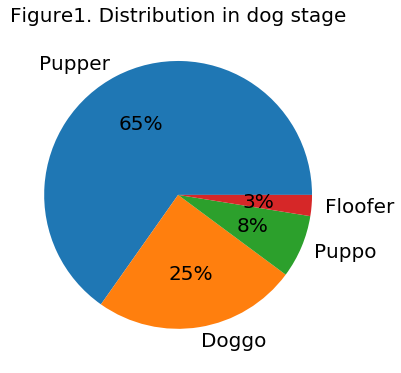

In [3]:
plt.figure(figsize=(6,10))
plt.title('Figure1. Distribution in dog stage',fontsize=20)
plt.pie(twitter_data.dog_stage.value_counts(),
        labels=['Pupper','Doggo','Puppo','Floofer'],autopct='%.0f%%',textprops = {'fontsize':20, 'color':'k'})
plt.show()

### Favorite counts vs Retweet counts.

Figure 3 indicated the strong positive relationship between favorite counts and retweet counts.

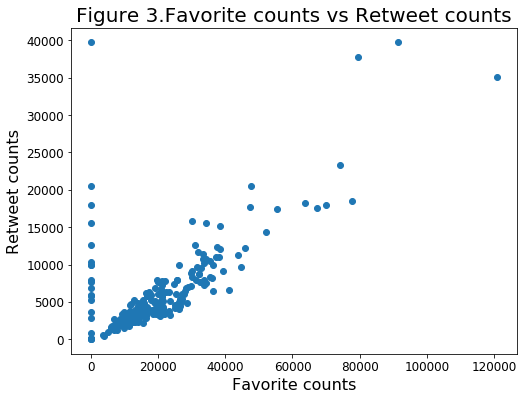

In [4]:
plt.figure(figsize=(8,6)) 
plt.title('Figure 3.Favorite counts vs Retweet counts',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Favorite counts',fontsize=16)
plt.ylabel('Retweet counts',fontsize=16)
plt.scatter(x="favorite_count", y="retweet_count", data=twitter_API)
plt.show()

### Monthly Tweet activity.

The Tweet activity is a tool both audiences and authors can use to learn more about this blog or twitter accounts.[3] The monthly activities during Nov. 2015 to Aug. 2017 were isolated and counting by the number of twitters. The figure showed WeRateDog reached its peak of activity in 2015 but rapidly decreased. And during the year of 2016 to mid of 2017, it keeps the frequency of tweeting in 100 twitters per month.I do some research about this account that WeRateDogs Twitter account was started in November 2015 and in 2017 a spin-off Twitter account, Thoughts of Dog was established which may shunt the user from original account.[4]

_Reference:_

[3]https://help.twitter.com/en/managing-your-account/using-the-tweet-activity-dashboard

[4]https://en.wikipedia.org/wiki/WeRateDogs 

In [5]:
activity=twitter_data['timestamp'].astype('str').str.extract(r'([12]\d{3}-(0[1-9]|1[0-2]))')[0].value_counts()

In [6]:
activity.sort_index(inplace=True)

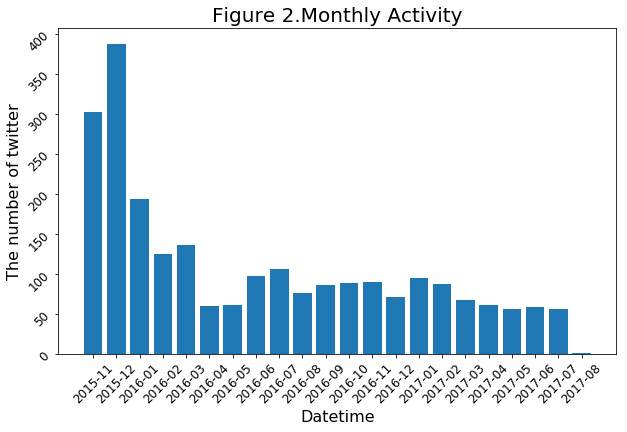

In [7]:
plt.figure(figsize=(10,6)) 
plt.title('Figure 2.Monthly Activity',fontsize=20)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(rotation=45,fontsize=12)
plt.xlabel('Datetime',fontsize=16)
plt.ylabel('The number of twitter',fontsize=16)
plt.bar(activity.index,activity)
plt.show()

## Image Predictions

The breeds of dogs were classified according to every image posted through a neural network. The number one prediction, the confidence coefficients and whether the predictions are right or not are contained in this dataset. Twitters of WeRateDogs are generally post one image with a humorous comment about the dog, but sometimes there are two or three pictures posted. Does more pictorial information increase the accuracy of prediction? Moreover, when accessing dataset, I noticed that some predictions with high confidence coefficients are mistakenly predict. For example, the picture below was predicted most likely to be a shopping cart with probability of 0.962465. This error may be resulting from unoptimized algorithm as well as lacking pictorial information.

<img src="https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg" width="300">

In [8]:
image_prediction_clean=image_predictions.copy()

### Accuracy of predication

I visulized the prediction accuracyof  most likely prodiction and the results showed 74% are correctly predicted.

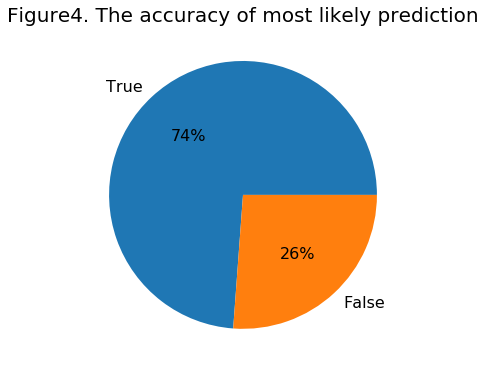

In [9]:
image_prediction_clean.p1_dog.value_counts()

plt.figure(figsize=(6,10))
plt.title('Figure4. The accuracy of most likely prediction',fontsize=20)
plt.pie(image_prediction_clean.p1_dog.value_counts(),
        labels=['True','False'],autopct='%.0f%%',textprops = {'fontsize':16, 'color':'k'})
plt.show()

To explore the relation between the accuracy of prediction with the number of images as well as the confidence coefficient, I convert the categorical data of p1_dog that representing whether or not the most confident prediction is a breed of dog to quantitive datatype using get_dummies method of Pandas libiary, where 1 in True column means the p1 prediction is True. A linear regression model was fitted between the accuracy of prediction with the number of images and the confidence coefficient.

In [10]:
image_prediction_clean[['False','True']]=pd.get_dummies(image_prediction_clean['p1_dog'])

In [11]:
image_prediction_clean['intercept']=1
lm=sm.OLS(image_prediction_clean['True'],image_prediction_clean[['intercept','img_num','p1_conf']])
result=lm.fit()

In [12]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   True   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     15.00
Date:                Mon, 08 Apr 2019   Prob (F-statistic):           3.42e-07
Time:                        10:33:30   Log-Likelihood:                -1223.7
No. Observations:                2075   AIC:                             2453.
Df Residuals:                    2072   BIC:                             2470.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6213      0.028     21.831      0.000       0.566       0.677
img_num        0.0020      0.017      0.113      0.910      -0.032       0.036
p1_conf        0.1928      0.036      5.337      0.000       0.122       0.264
==============================================================================
Omnibus:                      436.656   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              446.953
Skew:                          -1.066   Prob(JB):                     8.82e-98
Kurtosis:                       2.211   Cond. No.                         7.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results showed the number of images (coef< 0.05) is statistically significant for the accurate predicting whereas confidence coefficient(coef>0.05) is not related with. However, the R-squared is 0.014 (less than 0.3) indicating the weak linear relationship. Further regression model need to be fitted to optimize the relationship analysis.

###  Erroneous predictions

The distribution confidence coefficients of erroneous predictions was isolated and plotted. The figure 5 showed that for the erroneous predictions group, a large proportion of them with confidence coeffcients larger than 0.95, which indicating the prediction algorithm need further optimize to exactlt grab the targeted objectives.

In [13]:
image_prediction_clean[image_prediction_clean['p1_dog']==False].describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf,False,True,intercept
count,5.430000e+02,543.000000,543.000000,5.430000e+02,5.430000e+02,543.0,543.0,543.0
mean,7.257665e+17,1.178637,0.540167,1.155780e-01,5.614976e-02,1.0,0.0,1.0
std,6.398110e+16,0.525498,0.294639,9.284124e-02,4.571410e-02,0.0,0.0,0.0
min,6.660519e+17,1.000000,0.059033,1.011300e-08,1.740170e-10,1.0,0.0,1.0
25%,6.729825e+17,1.000000,0.280340,4.617995e-02,1.818890e-02,1.0,0.0,1.0
50%,6.946697e+17,1.000000,0.493257,9.872700e-02,4.881320e-02,1.0,0.0,1.0
75%,7.693038e+17,1.000000,0.821904,1.606135e-01,8.260440e-02,1.0,0.0,1.0
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.551820e-01,1.0,0.0,1.0


In [14]:
p1_conf_dis=image_prediction_clean[image_prediction_clean['p1_dog']==False].p1_conf

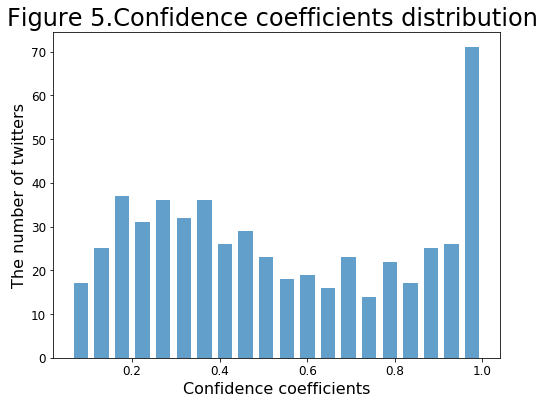

In [15]:
plt.figure(figsize=(8,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Confidence coefficients',fontsize=16)
plt.ylabel('The number of twitters',fontsize=16)
plt.title('Figure 5.Confidence coefficients distribution ',fontsize=24)
plt.hist(p1_conf_dis,bins=20,alpha=0.7, rwidth=0.7)
plt.show()